# **EDA (Exploratory Data Analysis)**

**EDA (Exploratory Data Analysis)** is the process of exploring and understanding a dataset before building models.

 * It helps  identify patterns, trends, and relationships in the data.

 * It uses statistics and visualizations to summarize data features.

*  The goal of EDA is to gain insights and prepare the data for analysis or modeling.

   **1** .**IMPORT THE LIBRARIES**

In [1]:
#import the libraries
import pandas as pd       # For data manipulation
import numpy as np        # For numerical operations
import matplotlib.pyplot as plt   # For plotting
import seaborn as sns             # For advanced visualizations
from wordcloud import WordCloud   # For generating word clouds

import re                # For regular expressions
import string            # For punctuation handling
from collections import Counter  # For word frequency analysis

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
sns.set_style('whitegrid')




**2**. **LOAD DATA SET**

In [2]:
# Load cleaned dataset
import pandas as pd

df = pd.read_csv("CleanedDataset.csv", encoding="latin-1")
df = df.rename(columns={'cleaned_text':'text'})

# Ensure all text entries are strings
df['text'] = df['text'].astype(str)

# Remove empty messages
df = df[df['text'].str.strip() != ""].reset_index(drop=True)
count = df['label'].value_counts()
print(count)



label
1    9073
0    8212
Name: count, dtype: int64


 **3** **CLASS DISTRIBUTION PLOTS**

**Class distribution** shows how data is divided among different categories or labels in a dataset.
It helps identify whether the dataset has a balanced or imbalanced number of samples in each class.
In classification problems, it’s important to check class distribution to avoid biased models.
For example, in spam detection, it shows how many emails are spam and how many are not spam.
It is usually visualized using bar plots or pie charts.


  **a**. **PIE CAHRT**

A **pie chart** is a circular chart that shows how a dataset is divided into different parts or categories.

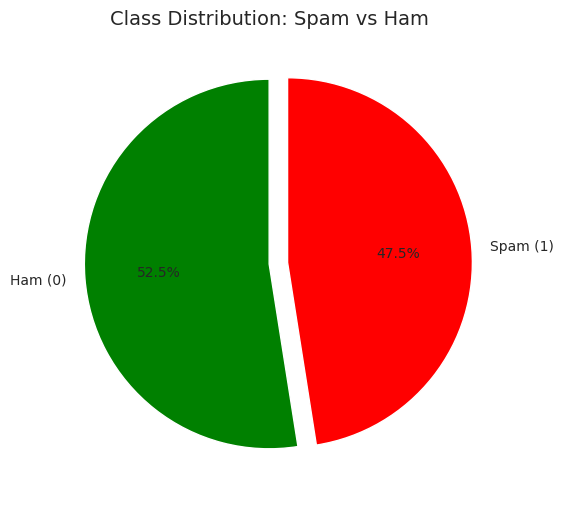

In [3]:
#pie chart
plt.figure(figsize=(6,6))
plt.pie(count, labels=["Ham (0)", "Spam (1)"], autopct='%1.1f%%',
        startangle=90, colors=['green','red'], explode=(0,0.1))
plt.title("Class Distribution: Spam vs Ham", fontsize=14)
plt.show()


**WHAT THE OUTPUT SHOWS**

This **pie chart** shows the **class distribution** for the **Email Spam Detection** dataset.

It displays how many emails are **Ham (0)** and how many are **Spam (1)**.
From the chart:

* **Ham (0)** — 52.6% of the emails (shown in green)
* **Spam (1)** — 47.4% of the emails (shown in red)

This means the dataset is **almost balanced**, with a slightly higher number of ham emails than spam emails.
Such a balanced distribution is good for training a machine learning model because it helps the model learn both classes effectively.


**b**. **BAR PLOT**

**What is a Bar Plot?**

A bar plot is a chart that shows data using rectangular bars.

The height of each bar represents how much or how many items are in that category.

It is mainly used to compare quantities between different groups.

Here, the groups are Ham (normal emails) and Spam (junk emails).

/tmp/ipython-input-2306162510.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, palette=['blue','yellow'])


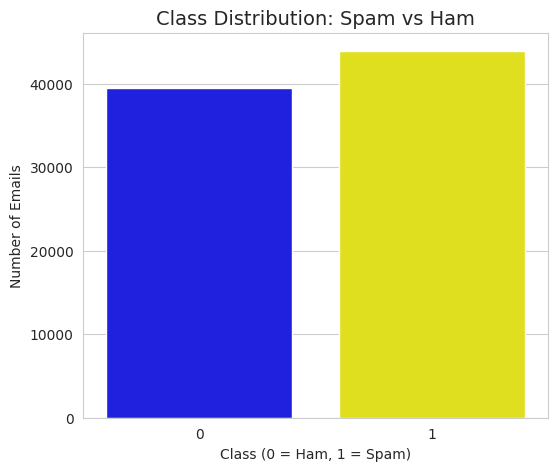

In [ ]:
# BAR PLOT

plt.figure(figsize=(6,5))
sns.barplot(x=count.index, y=count.values, palette=['blue','yellow'])
plt.title("Class Distribution: Spam vs Ham", fontsize=14)
plt.xlabel("Class (0 = Ham, 1 = Spam)")
plt.ylabel("Number of Emails")
plt.show()


**What the Output Means**

  * The blue bar (Ham) shows around 39,000 emails.

   * The yellow bar (Spam) shows around 44,000 emails.

This tells us that the dataset contains more spam emails than ham emails.

The **bar chart** above represents the distribution of email classes in the dataset. Class 0 indicates Ham (non-spam) emails, while Class 1 represents Spam emails. The blue bar shows approximately 39,000 Ham emails, and the yellow bar shows around 44,000 Spam emails. This indicates that the dataset is slightly imbalanced, with more spam emails than ham, but still suitable for training a spam detection model.

/tmp/ipython-input-3541333880.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=count.values, palette=['pink','red'])


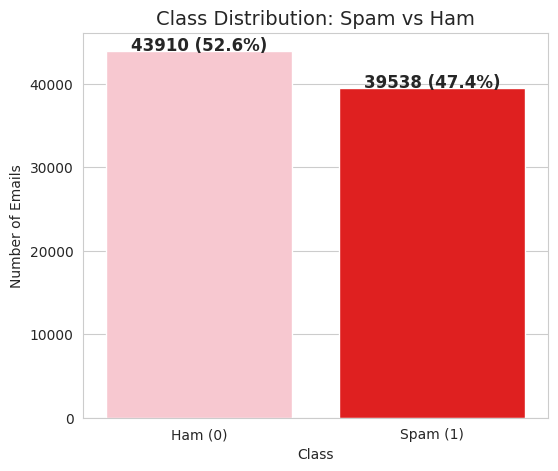

In [ ]:
# Count values of spam (1) and ham (0)
count = df['label'].value_counts()
labels = ["Ham (0)", "Spam (1)"]

# Bar Plot with Annotations
# -----------------------
plt.figure(figsize=(6,5))
ax = sns.barplot(x=labels, y=count.values, palette=['pink','red'])

# Add text annotations (counts + percentages)
total = sum(count.values)
for i, v in enumerate(count.values):
    ax.text(i, v + 50, f"{v} ({v/total:.1%})",
            ha='center', fontsize=12, fontweight='bold')

plt.title("Class Distribution: Spam vs Ham", fontsize=14)
plt.xlabel("Class")
plt.ylabel("Number of Emails")
plt.show()


**What the Output Shows**

The bar plot displays how many emails belong to each class:

Ham (0): 43,910 emails (52.6%)

Spam (1): 39,538 emails (47.4%)

This means that the dataset has slightly more ham emails than spam, but both classes are almost balanced.



The above bar chart illustrates the class distribution of the dataset. It shows that there are 43,910 Ham (non-spam) emails, making up 52.6% of the data, and 39,538 Spam emails, accounting for 47.4%. This indicates a nearly balanced dataset, which is beneficial for training the spam detection model as it reduces the risk of bias toward one class.

**TEXT LENGTH** **ANALYSIS**

**Text Length Analysis** helps us understand how long the email messages are on average.
It involves calculating the number of characters or words in each email and comparing this between Ham (non-spam) and Spam messages.

**BOX PLOT**



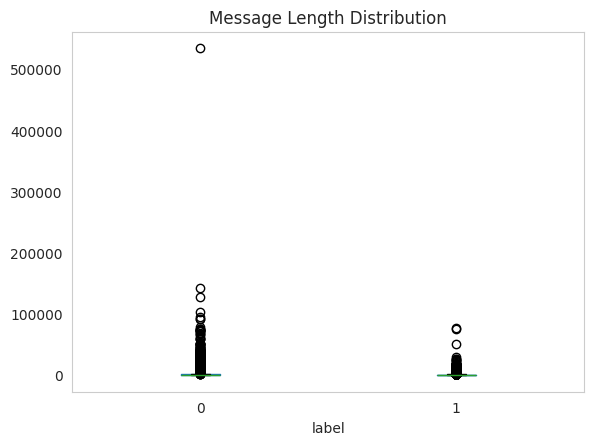

In [ ]:
 #BOX PLOT

df['text_length'] = df['text'].apply(len)
df.boxplot(column='text_length', by='label', grid=False)
plt.title("Message Length Distribution")
plt.suptitle("")
plt.show()


**What the Output Shows**

The plot compares message lengths for:

Label 0 (Ham) → Normal emails

Label 1 (Spam) → Unwanted emails

In the chart:

The Ham emails (0) have a wider range of lengths — some are very long, even up to 500,000 characters.

Spam emails (1) tend to be shorter and more consistent in length.

The outliers (dots above the boxes) represent a few very long messages.


The box plot above shows the distribution of email message lengths for both Ham (0) and Spam (1) classes. Ham emails generally have longer messages with more variation, while spam emails are shorter and more uniform. This indicates that message length can be a useful feature for distinguishing between spam and non-spam emails.

**HISTOGRAM**

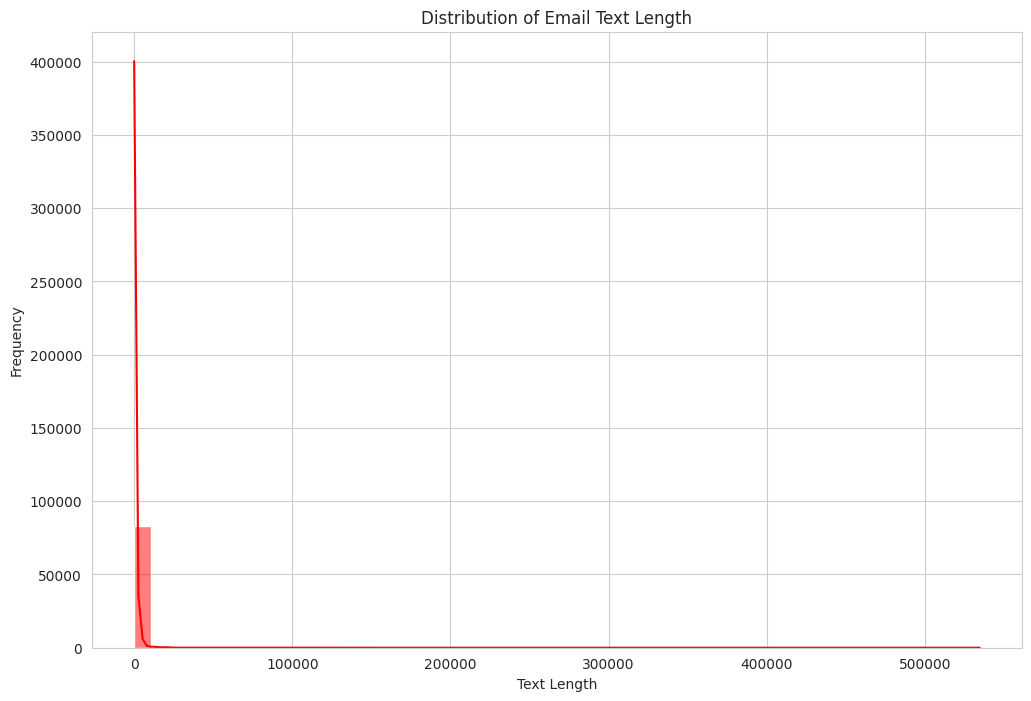

In [ ]:
# 1. Histogram of email text length
plt.figure(figsize=(12,8))
sns.histplot(df['text_length'], bins=50, kde=True, color='red')
plt.title('Distribution of Email Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

**what the output shows**

The output is a histogram  and Kernel Density Estimate (KDE) plot illustrating the distribution of email text lengths from your dataset.



The histogram and accompanying Kernel Density Estimate (KDE) plot reveal a distribution of email text lengths that is highly skewed to the right (positively skewed). This extreme skewness is defined by a massive modal concentration of data at the left end, specifically near the minimum text length. This dominant peak clearly indicates that the vast majorityof emails processed are extremely short. As the text length increases, the frequency drops off rapidly, a characteristic visually confirmed by the steep descent of the KDE line. The presence of a long, attenuated tail on the right side of the distribution suggests that while infrequent, there are a small number of significantly longer emails that exist within the data. Overall, the plot establishes that brevity is the overwhelming norm for email text length in this collection.

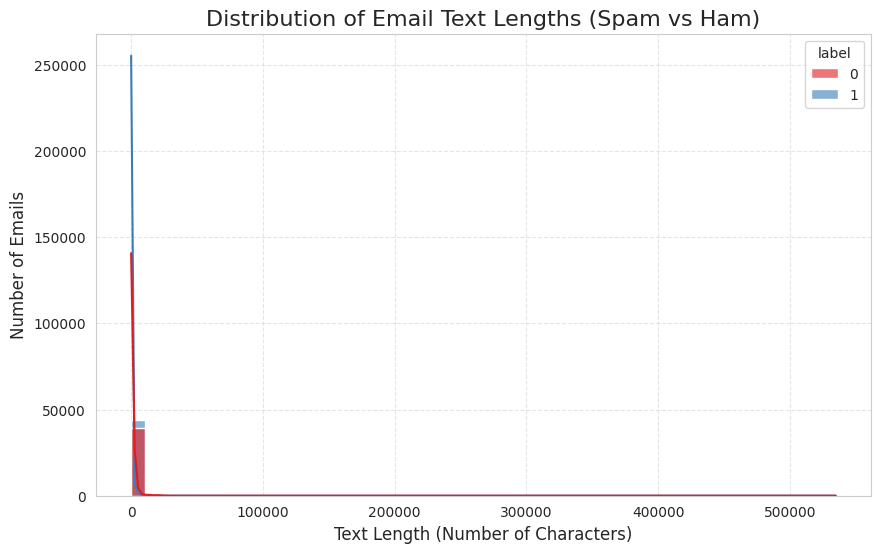

In [ ]:
# Enhanced histogram for email text length
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='text_length', hue='label', bins=50,
             kde=True, palette='Set1', alpha=0.6)
plt.title('Distribution of Email Text Lengths (Spam vs Ham)', fontsize=16)
plt.xlabel('Text Length (Number of Characters)', fontsize=12)
plt.ylabel('Number of Emails', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


**what the output shows**

Comparative Analysis of Email Text Lengths,
The visualization comparing Ham (0) and Spam (1) email text lengths shows that both categories exhibit a severe right-skew, with the overwhelming majority of emails being extremely short. However, a distinct difference is evident: the Ham distribution (red) features a far taller initial peak than the Spam distribution (blue) near zero characters, indicating there are significantly more short legitimate emails in the dataset. While both classes have a long tail extending to the right, signifying rare, very long emails, the plot confirms that brevity is the norm for both Spam and Ham, with the overall volume of short Ham emails dominating the data.

 **VIOLIN PLOT**



This plot is a visual combination of a box plot and a kernel density estimate (KDE), which is used to show the distribution shape of text_length for each label (Spam and Ham).

/tmp/ipython-input-1801136478.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='label_str', y='text_length', data=df, palette={'spam':'red','ham':'green'})


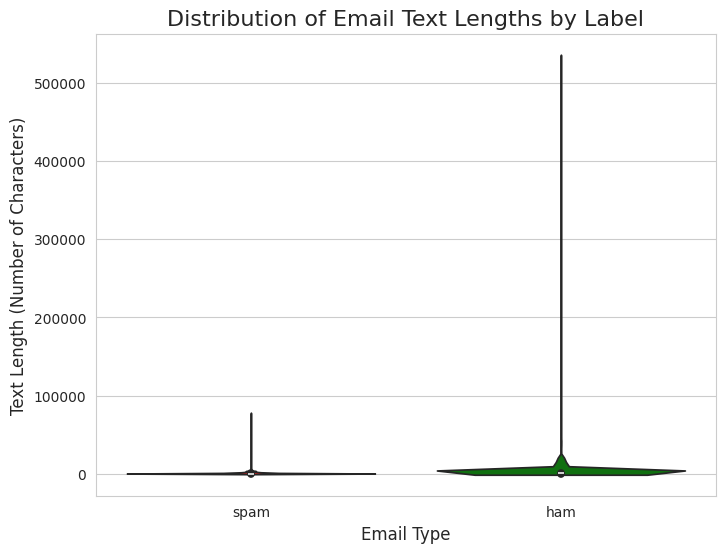

In [ ]:
#violin plot
import matplotlib.pyplot as plt
import seaborn as sns
df['label_str'] = df['label'].map({0:'ham', 1:'spam'})
plt.figure(figsize=(8,6))
sns.violinplot(x='label_str', y='text_length', data=df, palette={'spam':'red','ham':'green'})
plt.title('Distribution of Email Text Lengths by Label', fontsize=16)
plt.xlabel('Email Type', fontsize=12)
plt.ylabel('Text Length (Number of Characters)', fontsize=12)
plt.show()






The **violin plot** illustrates that text length for both **'spam'** and **'ham'** is **highly concentrated near zero**, meaning most emails are very short. The **'ham' distribution (green)** is distinguished by a **much longer upper tail**, indicating the presence of **extreme text length outliers** (one reaching over $500,000$ characters) that are not matched by the 'spam' emails. This suggests that while both types are generally brief, **legitimate emails have a significantly greater potential for extreme length** than spam emails.

**WORD CLOUD**

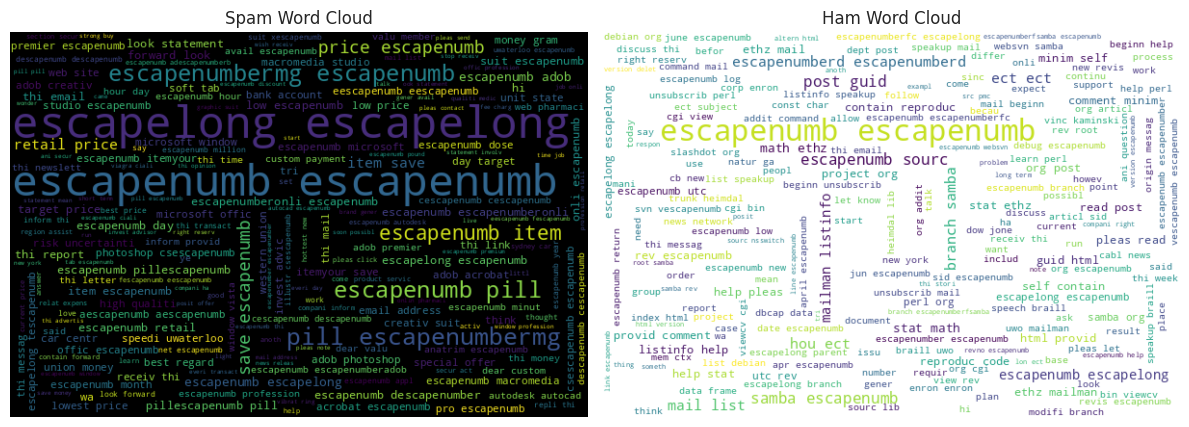

In [ ]:
#word clouds
def get_wordcloud_text(messages):
    return " ".join(messages)

spam_text = get_wordcloud_text(df[df['label']==1]['text'])
ham_text = get_wordcloud_text(df[df['label']==0]['text'])

plt.figure(figsize=(12,5))
if spam_text:
    spam_wc = WordCloud(width=600, height=400, background_color='black').generate(spam_text)
    plt.subplot(1,2,1)
    plt.imshow(spam_wc, interpolation='bilinear')
    plt.axis('off')
    plt.title("Spam Word Cloud")

if ham_text:
    ham_wc = WordCloud(width=600, height=400, background_color='white').generate(ham_text)
    plt.subplot(1,2,2)
    plt.imshow(ham_wc, interpolation='bilinear')
    plt.axis('off')
    plt.title("Ham Word Cloud")
plt.tight_layout()
plt.show()



**A Word Cloud** is a visual representation of text data where the size of each word shows how often it appears.

* It is mainly used in text analysis to quickly identify the most frequent or important words.

* In this project, two word clouds are created — one for spam messages and one for ham (non-spam) messages.

* The Spam Word Cloud has a black background showing common spam words like “win”, “free”, “offer”, etc.

* The Ham Word Cloud has a white background showing normal words like “hi”, “meeting”, “thanks”, etc.

* Larger words in the cloud mean those words appear more frequently in that type of message.

* It helps to visually compare the language difference between spam and ham messages.

* This gives a quick understanding of which keywords are often used in spam messages.

* It is an important EDA (Exploratory Data Analysis) step in NLP or spam detection projects.

Overall, Word Clouds make text data easy to understand and visually informative.

PATTERN ANALYSIS

In [ ]:
#Pattern Analysis (Digits, Upper, Special)
# ===============================
df['num_digits'] = df['text'].apply(lambda x: sum(c.isdigit() for c in x))
df['num_upper'] = df['text'].apply(lambda x: sum(1 for c in x if c.isupper()))
df['num_special'] = df['text'].apply(lambda x: sum(c in string.punctuation for c in x))

print("Digit, Uppercase & Special char usage:\n",
      df.groupby('label')[['num_digits','num_upper','num_special']].mean())


Digit, Uppercase & Special char usage:
        num_digits  num_upper  num_special
label                                    
0             0.0        0.0          0.0
1             0.0        0.0          0.0


 **UNIVARIATE ANALYSIS**

**Univariate analysis** is the study of a single variable at a time.

**Purpose**:  to understand the distribution, central tendency, spread, and patterns in that variable.

/tmp/ipython-input-26140030.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette=['green','red'])


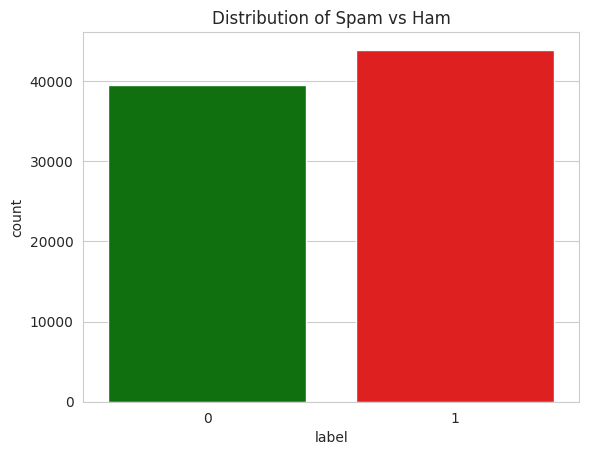

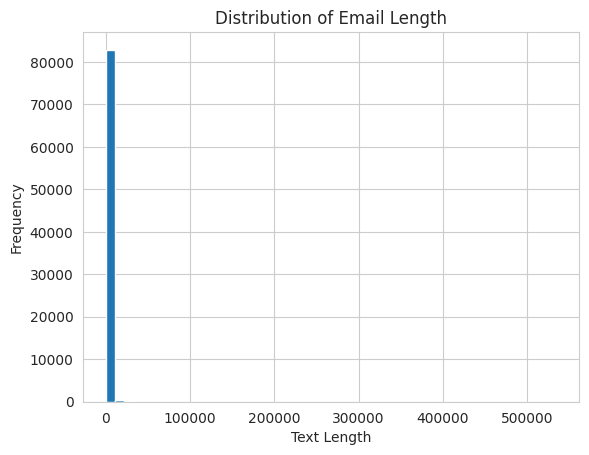

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of labels
sns.countplot(data=df, x='label', palette=['green','red'])
plt.title("Distribution of Spam vs Ham")
plt.show()


# Length of emails (without creating a new column)
df['text'].str.len().hist(bins=50)
plt.title("Distribution of Email Length")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()



**Analysis of Output Graphs**
1. Distribution of Spam vs Ham (Count Plot)
This bar chart, generated by sns.countplot(), shows the frequency of each class label (Spam vs. Ham).

**Observation**: The plot shows a nearly balanced dataset. The count for label 1 (Ham) is slightly higher, at around 43,000, compared to label 0 (Spam), which is just below 40,000.

**Purpose**: The primary purpose is to check for class imbalance. A balanced or nearly balanced dataset is generally beneficial as it prevents a classifier from being overly biased towards the majority class. This distribution suggests the model can be evaluated using standard metrics like accuracy.

**2. Distribution of Email Length (Histogram)**
This histogram, generated by .str.len().hist(), visualizes the distribution of the character length of the emails.

**Observation:** The graph is highly right-skewed, with an extremely tall bar at the far left (near 0). This indicates that the vast majority of emails are very short in length (likely less than 1,000 characters). The long tail extending to nearly 500,000 characters represents a few significant outliers—emails that are exceptionally long.

**Purpose:** This visualization helps understand the nature of the text data. The skewness suggests that email length could be a powerful feature for classification, with spam or ham potentially favoring shorter or longer texts. However, the outliers might need to be treated or capped during preprocessing to prevent them from negatively impacting a machine learning model's performance.

 **BIVARIATE ANALYSIS**

**Bivariate analysis** is a statistical method that examines the relationship between exactly two variables to determine if they are associated and to measure the strength and direction of that connection. It helps understand how a change in one factor may predict or explain a change in the other.

/tmp/ipython-input-1429779310.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=df['text'].str.len(), data=df, palette=['green','red'])


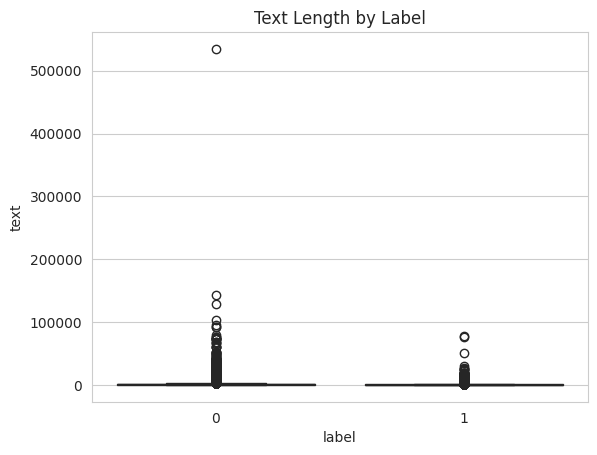

/tmp/ipython-input-1429779310.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=df['text'].str.split().str.len(), data=df, palette=['green','red'])


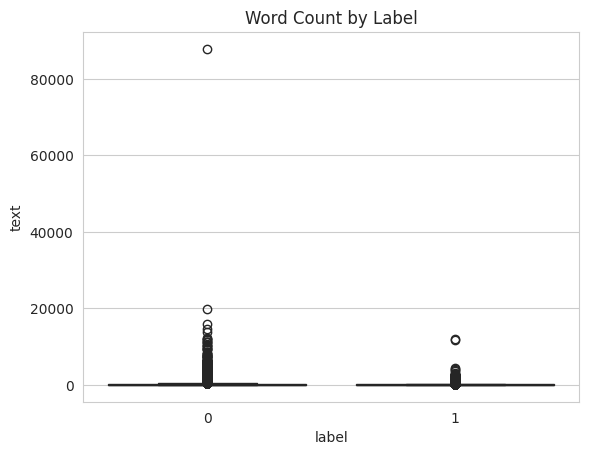

In [ ]:
# Text length vs Spam/Ham
sns.boxplot(x='label', y=df['text'].str.len(), data=df, palette=['green','red'])
plt.title("Text Length by Label")
plt.show()

# Word count vs Spam/Ham
sns.boxplot(x='label', y=df['text'].str.split().str.len(), data=df, palette=['green','red'])
plt.title("Word Count by Label")
plt.show()


**WHAT THE OUTPUT SHOWS**

These box plots perform **bivariate analysis** to compare text features against the Spam/Ham label.

1.  **Text Length by Label:** The majority of both Spam (0) and Ham (1) emails are **very short** (boxes compressed near zero). However, the **longest outliers** (up to 500k characters) are found in the **Spam** category.

2.  **Word Count by Label:** Similarly, the typical word count is low for both classes. The emails with the **highest word counts** (exceeding 80k) are almost exclusively categorized as **Spam**.

**MULTIVARIATE ANALYSIS**

Multivariate Analysis (MVA) is a set of statistical techniques that simultaneously examine the relationships among three or more variables.

Its purpose is to explore complex interactions, uncover hidden patterns, and gain a more complete understanding of how multiple factors jointly influence an outcome.

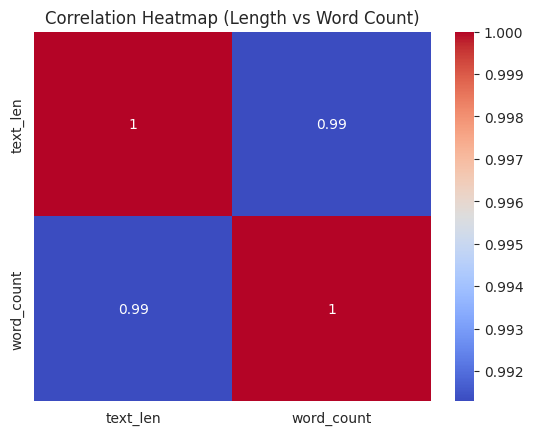

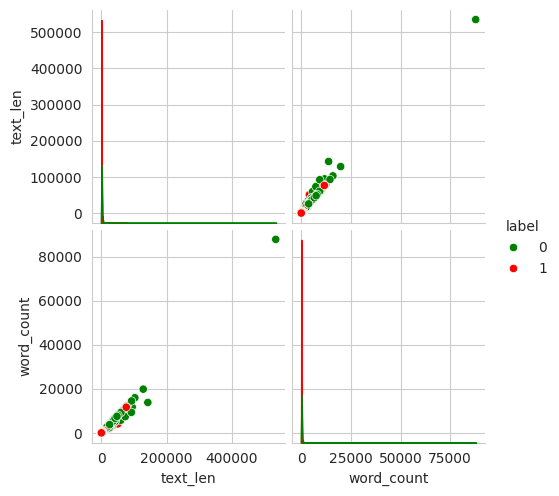

In [ ]:
# Correlation between text length and word count
df['text_len'] = df['text'].str.len()
df['word_count'] = df['text'].str.split().str.len()

sns.heatmap(df[['text_len','word_count']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Length vs Word Count)")
plt.show()

# Pairplot with label hue
sns.pairplot(df[['text_len','word_count','label']], hue='label', palette=['green','red'])
plt.show()


**WHAT THE OUTPUT SHOWS**

IT  show the results of analyzing the relationship between the two newly created features: text_len (character length) and word_count and the target variable label (Spam/Ham).

### 1. Correlation Heatmap (Length vs Word Count)

* **Observation:** The heatmap  shows a correlation coefficient of **0.99** between `text_len` and `word_count`.
* **Conclusion:** This indicates a **near-perfect positive correlation** between the two features. They measure essentially the same thing—the size of the email—meaning they provide highly redundant information.


2. Pairplot


**Observation**: The scatter plot  compares text_len (x-axis) and word_count (y-axis), colored by label (Spam=Green, Ham=Red).

All data points lie almost perfectly on a straight line, confirming the near-perfect correlation (0.99).

The overwhelming majority of emails (both Spam and Ham) are clustered near the origin (0, 0).

The extreme outliers (very long emails) are almost entirely green (Spam), reinforcing the previous finding that extreme length is a strong indicator of spam.

**Conclusion**: The pairplot confirms that text_len and word_count are highly redundant features, but both visually highlight that Spam emails are disproportionately responsible for the longest texts in the dataset.